# Automatic Differentiation

## Table of Contents
### 1. Introduction
#### 1.1 Motivation
#### 1.2 Automatic Differentiation
### 2. Background
#### 2.1 Chain Rule
#### 2.2 Forward Mode
#### 2.3 Reverse Mode
#### 2.4 Dual Numbers
#### 2.5 Math with Dual Numbers
#### 2.6 An Example
#### 2.7 Vector Valued Functions
### 3. Usage
#### 3.1 How to Use
#### 3.2 Installation
### 4. Software Organization
#### 4.1 Directory Structure
#### 4.2 Basic Modules
#### 4.3 Tests Design
#### 4.4 Package and Distribution
### 5. Implementation
#### 5.1 Core Data Structures
#### 5.2 Core Classes
#### 5.3 Important Attributes
#### 5.4 External Dependencies
#### 5.5 Elementary Functions
### 6. Extension: Reverse Mode
#### 6.1 Reverse Mode
#### 6.2 Algorithm
#### 6.3 Implementation
#### 6.4 An Example
### 7. Broader Impact and Inclusivity statement
### 8. Future Features
### 9. Licensing
#### 9.1 License

## 1. Introduction

```autodiff``` is a package that provides users with forward-mode and reverse-mode automatic differentiation tools to compute derivatives of mathematical functions up to machine precision with high efficiency. With this software, the user can perform automatic differentiation for themselves. Our software focuses on the elementary functions of automatic differentiation for users who are more unfamiliar with the concept to utilize. 


### 1.1 Motivation

Differentiation is one of the most used operations in fields ranging from Medicine to Engineering. We seek to compute derivatives because they are indicators of rate of change, which can help with a wide range of applications including creating simulations, modeling, sensitivity analysis, and optimization problems.

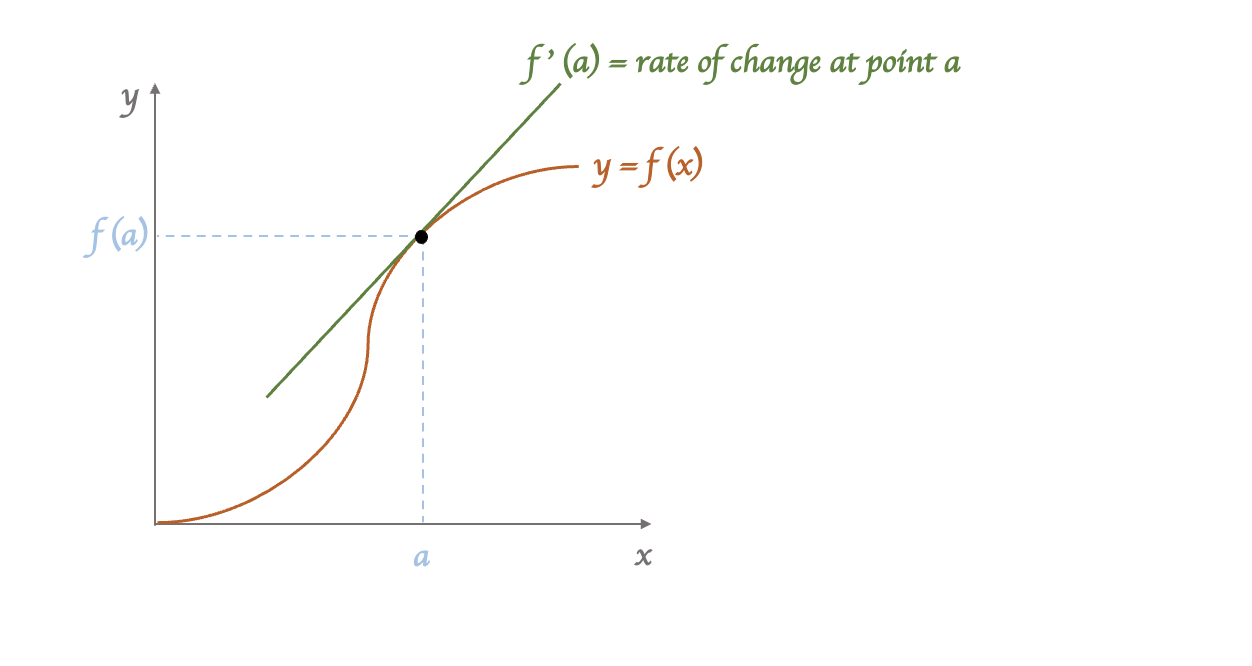

The three common computational techniques to compute derivatives are symbolic differentiation, numerical differentiation, and automatic differentiation. However, certain functions may be too complex for symbolic differentiation or the computation cost may be too high. Numerical differentiation, though it can evaluate highly complex functions, will produce values with low accuracy. Automatic differentiation negates both issues; it is more efficient than symbolic differentiation and the values are evaluated to machine precision. 

### 1.2 Automatic Differentiation

All mathematical functions can be divided into two fundemental categories: basic functions we are familiar with such as $x_1 + x_2$ or $x^2$, and complex functions that are composed of basic elements, $4x \cdot e^{2x+3}$ for example. Automatic differentiation is centered around the second concept. We can define automatic differentiation as the following statement:

Given a collection of elementary functions, such as $x^2$, $sin(x)$, and $e^x$, then using the chain rule, we can determine the derivative of any function that is made up of these elementary functions.

It is an extremely powerful concept as we can keep composing and stacking functions, and automatic differentiation algorithm will follow the construction of the elementary functions and compute a derivative for us.

## 2. Background

### 2.1 Chain Rule
The chain rule helps us find the derivative of a composite function. Automatic differentiation applies the chain rule repeatedly to a function broken down to its simple operations. 

For a function $f(g(x))$, we would have to apply the chain rule in order to calculate the derivative of $f$ with respect to $x$. That gives us $\frac{df}{dx}=\frac{df}{dg}\frac{dg}{dx}$.

### 2.2 Forward Mode
When performing forward mode automatic differentiation on a function $f$, we are breaking down the equation $f(x)$ with complex operations into elementary nodes starting from the innermost operations. Next, we evaluate each sequence of elementary operations (primal trace) and the partial derivative with respect to each node in the direction we choose (tangent trace). We then carry the calculated traces to the next node to perform further evaluations till we reach the last node. 

For a function $f(x_1+x_2) = e^{-(sinx_1-cosx_2)^2}$, we will visualize the computational graph and produce a trace table in the following two sub-sections below.

#### 2.2.1 Computational Graph
A computational graph is a powerful tool for evaluating mathematical expressions by breaking down a desired function $f(x)$ into fundamental operations at each node. For the function above, we will obtain the computational graph below. Each node represents the trace and each edge represents an elementary operation. Starting from the innermost operations, forward mode moves outward and accumulates traces obtained at each node. In the example below, we assign variables $x_1$ and $x_2$ to be our first two nodes. Then we apply the closest basic operations on the nodes respectively ($sin$ and $cos$ in this case), and compute the primal and tangent traces to obtain the third and fourth nodes. With the same principle, we create a fifth node by moving to the next closest basic operation (adding third and fourth nodes together in this case), and keep repeating the process till the entire function is evaluated.

![Computational graph example](img/computationalgraph1.png "Computational graph example")

#### 2.2.2 Trace Table
The trace table records the values for each sequence of elementary operations. For the function above, we will obtain the trace table below evaluated at $f(2,3)$ in directions $p_1$ and $p_2$, respectively. The last node ($v_6$) produces the final results of function $f(x_1,x_2)$ evaluated at point $(2,3)$ in directions $(1,0)$ and $(0,1)$.

![Trace table example](img/tracetable.png "Trace table example")

### 2.3 Reverse Mode
Reverse mode automatic differentiation is a method for efficiently computing the derivatives of a function with respect to its inputs. This method is the opposite approach of forward mode automatic differentiation, which starts from the inputs and moves outward to compute the derivatives. In contrast, reverse mode starts from the outputs and moves inward, computing the derivatives of each intermediate node with respect to its outputs.

Reverse mode automatic differentiation is typically more efficient than forward mode automatic differentiation when you have a large number of inputs and a relatively small number of outputs. This is because reverse mode automatic differentiation only requires you to compute the gradient of the outputs with respect to the inputs once, and then it can propagate that gradient backwards through the computation to efficiently compute the gradients of all of the inputs with respect to the outputs. Forward mode automatic differentiation, on the other hand, requires you to compute the gradient of each input with respect to each output separately, which can be computationally expensive if you have a large number of inputs and a small number of outputs.

### 2.4 Dual Numbers
For our automatic differentiation implementation, we will make use of dual numbers to help us with our derivatives. 

Dual numbers are hypercomplex numbers that take the form $a + b\epsilon$ where $a$ and $b$ are real numbers, and $\epsilon^2 = 0$. Dual numbers are helpful in forward mode automatic differentiation due to its property of allowing us to calculate the value of a function and the derivative of the function at the same time, given by Taylor series expansion of a function about a dual point.

#### 2.4.1 Taylor Series Expansion
Taylor series approximates a function $f(x)$ about a point $a$ by its higher order derivative: 

![Taylor series](img/taylorseries.png "Taylor series")

For approximation about a dual point $a+\epsilon$, we apply the same principle and obtain the following expression: 

$f(a+\epsilon)=f(a)+\frac{f'(a)}{1!}+\frac{f''(a)}{2!}\epsilon^2+$...

Because 2 and all the higher order terms equal to 0, the expression is simplified to: 

$f(a+\epsilon)=f(a)+f'(a)$ 

This gives us the evaluation of the function $f$ and its derivative simultaneously when we evaluate it at a dual point $a+\epsilon$.

### 2.5 Math with Dual Numbers

#### 2.5.1 Addition and Subtraction
Adding dual numbers is done by adding the real and dual components separately. 

__Addition__ 

$(1+2\epsilon)+(3+4\epsilon)=(1+3)+(2+4)\epsilon=4+6\epsilon$

__Subtraction__

$(3+4\epsilon)+(1+2\epsilon)=(3-1)+(4-2)\epsilon=2+2\epsilon$

#### 2.5.2 Multiplication
The standard method for multiplying two binomials applies to dual numbers, following the First, Outer, Inner, Last (FOIL) method. Because of the property of $\epsilon^2=0$, the $\epsilon^2$ term disappears. 

$(1+2\epsilon)*(3+4\epsilon)=3+4\epsilon+6\epsilon+8\epsilon^2$ 

Since $\epsilon^2=0$, we are left with $(1+2\epsilon)*(3+4\epsilon)=3+10\epsilon$.

#### 2.5.3 Division
Division of dual numbers is defined only when the real part of the denominator is non-zero. The denominator is multiplied by its conjugate in order to cancel out the dual parts. A conjugate of dual number $a+b\epsilon$ takes the form $a-b\epsilon$. To divide an equation in the form of our example, we multiply both numerator and denominator by the conjugate of $3+4\epsilon$, which is $3-4\epsilon$. 

$\frac{1+2\epsilon}{3+4\epsilon}=\frac{(1+2\epsilon)(3-4\epsilon)}{(3+4\epsilon)(3-4\epsilon)}=\frac{3-4\epsilon+6\epsilon}{9-12\epsilon+12\epsilon}=\frac{3+2\epsilon}{9}=\frac{1}{3}+\frac{2}{9}\epsilon$

### 2.6 Foward Mode With Dual Numbers: An Example
Assume we have a function $f(x)=5x^2+10$ and we would like to calculate the value of $f(2)$ and $f^\prime(2)$. We would obtain the computational graph below. 

![Computational graph dual numbers](img/computationalgraph2.png "Computational graph dual numbers")

Our software assumes all input to be dual numbers. The scalar value $v_0=x=2$ in this case will be converted to $2+1\epsilon$. The dual component $b$ has a value of 1 because we are plugging in $x=2$, where $x$ has a derivative of 1. 

To obtain the value of $v_1$, we square the value of $v_0=2+1\epsilon$, which is calculated by multiplying $v_0$ with itself. 

$v_1=(2+1\epsilon)(2+1\epsilon)=4+2\epsilon+2\epsilon+12\epsilon^2=4+4\epsilon$

Next, we are multiplying $v_1$ by 5 to get the value of $v_2$. We first convert the scalar 5 into a dual number, which gives us $5+0\epsilon$. The dual component $b$ has a value of 0 because the derivative of a constant is 0. 

$v_2=(5+0\epsilon)(4+4\epsilon)=20+20\epsilon$

Lastly, we add 10 to $v_2$ to get the value of $v_3$. The dual number form of 10 is $10+0\epsilon$. 

$v_3=(20+20\epsilon)+(10+0\epsilon)=30+20\epsilon$

The real component $a=30$ corresponds to $f(2)$ and the dual component $b=20$ corresponds to $f^\prime(2)$. 

### 2.7 Vector Valued Functions
More generally we’d like to work with vector valued functions $f: ℝ^n \rightarrow ℝ^m$ that can take in multiple inputs ($n$) and produce multiple outputs ($m$).

So we need a way to represent the derivative of each output $y$ with respect to each input $x$ and the Jacobian matrix helps us do this.

Assume we are trying to evaluate the function at $\textbf{x} = \textbf{a}$, where $\textbf{a} \in ℝ^n$. In that case, the Jacobian matrix $J_f$ is in the form of

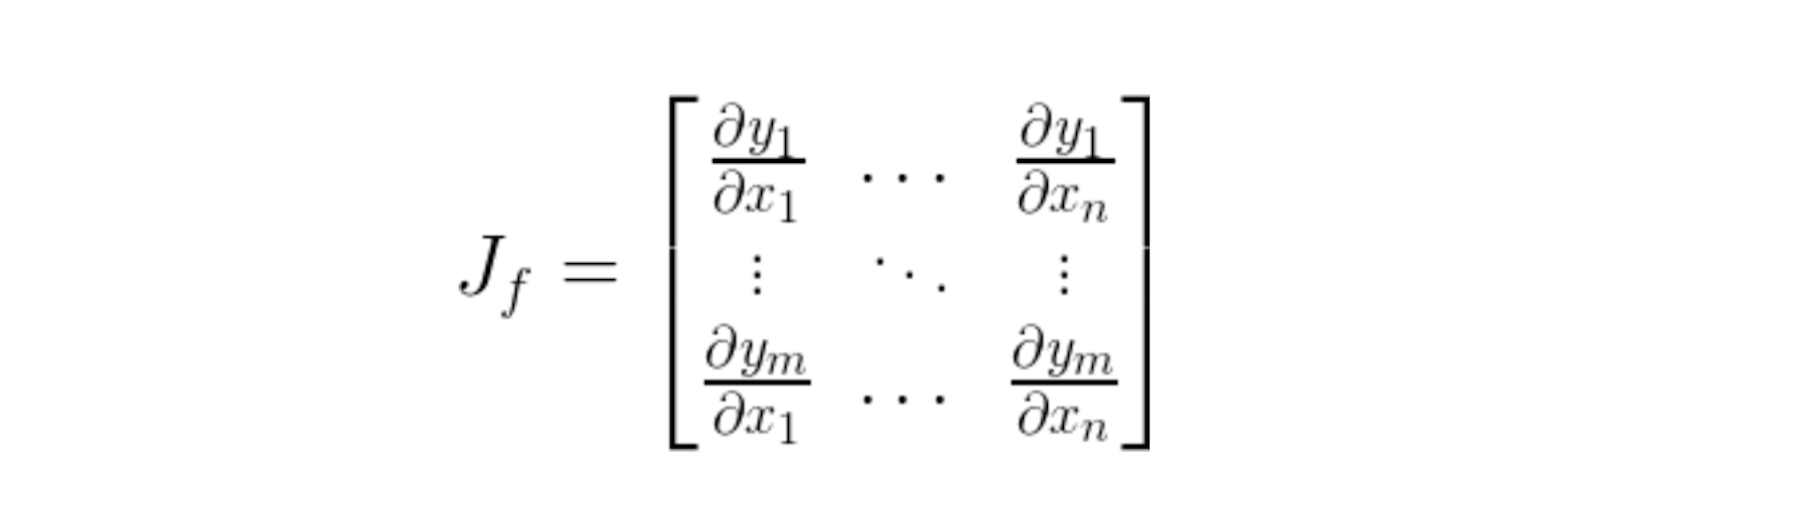

and each column consists of the partial derivatives of $y_j$ with respect to each $x_i$. So we can obtain the columns one by one by setting the corresponding $\dot x_i = 1$ and setting the other entries zero.

Hence now with Jacobian matrices, function $f$ is generalized to vector-based $f: ℝ^n \rightarrow ℝ^m$. 

## 3. Usage
### 3.1 Installation

The user needs to create a virtual environment by running the following commands in the directory where they wish to install the  ```autodiff``` package:

In [ ]:
# create the virtual environment
python -m venv test_env

# activate the virtual environment
source test_env/bin/activate

# install the autodiff package
pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple AutoDiff-Library==1.0

After testing out the desired functions in the package, user may deactivate the virtual environment and run the following commands:

In [ ]:
# deactivate the virtual environment
deactivate

# remove the virtual environment completely
rm -rf test_env

### 3.2 How to Use ```autodiff```

The user should import the ```autodiff``` package, and instantiate ```AD``` objects with function $f$ as the parameter. ```NumPy``` will also be needed to run our package.

In [ ]:
import autodiff import AD, ForwardMode, ReverseMode

#### Real function with scalar or vector inputs (Forward Mode)

In order to initialize a ```ForwardMode``` object for a real function, the user will need to pass in a function ```f``` and a list-type of input(s) inputs.

Function ```f```: The user can initialize the function $f$ either with lambda or regular python functions and pass it as an argument to ```AD.ForwardMode```. The operators are implemented in the ```Dual``` class.

List-type ```inputs```: The user must pass in a list-type of string inputs that correspond to the argument(s) that the user-defined function ```f``` can handle. This list cannot be empty.

With this ```ForwardMode``` object, the user can now use the ```get_f```, ```get_f_prime```, and ```get_results``` method to obtain the value and the derivative at value(s) that the user passes in. ```get_results``` returns an array with the ```get_f``` and ```get_f_prime``` outputs combined. All three methods take in the same input ```x```.

List-type ```x```: The user must pass in a list-type of int or float inputs. This list-type must correspond to and be the same length as the list-type of string inputs used to define a ForwardMode object earlier. i.e. for variables x and y where ```x = 1```, ```y = 2```, then ```inputs = ['x', 'y']``` and ```x = [1, 2]``` or their NumPy equivalent.

For example, the following code demonstrates how a user will be able to compute the value and the derivative of a scalar valued function $f(x)=2sin(x)+10$ and ```x = 1```.

In [ ]:
# initialize the function f
f = lambda x: 2 * AD.sin(x) + 10

# alternatively, the user can initalize the function f as a regular Python function
def f(x):
    return 2 * AD.sin(x) + 10

# pass it as an argument to AD
fm = ForwardMode(f, ['x'])

# initialize x
x = 1

# compute the function f(x), where x = 1
fm.get_f([x]) # output: 11.682941969615793

# compute the derivative f'(x), where x = 1
fm.get_f_prime([x]) # output: array([1.08060461])

# compute the function f(x) and the derivative f'(x) at the same time, where x = 1
fm.get_results([x]) # output: array([11.682941969615793, array([1.08060461])], dtype=object)

The same idea applies for a function with vector inputs. The following code demonstrates how a user will be able to compute the value and the partial derivatives of a vector valued function $f(x,y)=2sin(x)+3y$ and ```x = 1```, ```y = 2```.

In [ ]:
# initialize the function f
f = lambda x, y: 2 * AD.sin(x) + 3 * y

# alternatively, the user can initalize the function f as a regular Python function
def f(x, y):
    return 2 * AD.sin(x) + 3 * y

# pass it as an argument to AD
fm = ForwardMode(f, ['x', 'y'])

# initialize x, y
x = 1
y = 2

# compute the function f(x, y), where x = 1, y = 2
fm.get_f([x, y]) # output: 7.6829419696157935

# compute the partial derivatives ∂f/∂x and ∂f/∂y, where x = 1, y = 2
fm.get_f_prime([x, y]) # output: array([1.08060461, 3.        ])

# compute the function f(x, y) and the partial derivatives ∂f/∂x and ∂f/∂y at the same time, where x = 1, y = 2
fm.get_results([x, y]) # output: array([7.6829419696157935, array([1.08060461, 3.        ])], dtype=object)

#### Multiple functions with scalar or vector inputs (Forward Mode)

The only difference when initializing a ForwardMode object with multiple functions is that the input must be a list-type of all functions. The output for our partial derivatives will be a $m$ x $n$ array representing a Jacobian matrix, where $m$ is the number of functions and $n$ is the number of inputs.

For example, the following code demonstrates how a user will be able to compute the values and partial derivatives of functions $f1(x,y)=arctan(x)+10y$ and $f2(x,y,z)=z+\frac{sin(x)}{e^y}$ . Notice how $f1$ takes in a subset of $f2$'s arguments. This is perfectly valid as long as the ```input``` list-type contains all and only the argument names used i.e. ```['x', 'y', 'z']``` or its NumPy equivalent (order does not matter) and the ```x``` list-type corresponds to the ```input``` e.g. ```[1, 2, 3]``` or its NumPy equivalent (order must be the same as input).

In [ ]:
# initialize the functions f1 and f2
f1 = lambda x, y: AD.arctan(x) + 10 * y
f2 = lambda x, y, z: z + AD.sin(x) / AD.exp(y)

# alternatively, the user can initialize the functions f1 and f2 as regular Python functions.
def f1(x, y):
    return AD.arctan(x) + 10 * y

def f2(x, y, z):
    return z + AD.sin(x) / AD.exp(y)

# pass it as list-type to AD
fm = ForwardMode([f1, f2], ['x', 'y', 'z'])

# initialize x, y, z
x = 1
y = 2
z = 3

# compute the function f1(x, y) and f2(x, y, z), where x = 1, y = 2, z = 3
fm.get_f([x, y, z]) # output: array([20.78539816339745, 3.113880714064368], dtype=object)

# compute the partial derivatives ∂f1/∂x, ∂f1/∂y, ∂f1/∂z = 0, ∂f2/∂x, ∂f2/∂y, and ∂f2/∂z
fm.get_f_prime([x, y, z]) # output: array([array([ 0.5, 10. ,  0. ]),
                          #                array([ 0.07312197, -0.11388071,  1.        ])], dtype=object)

# compute the functions the partial derivatives at the same time
fm.get_results([x, y, z]) # output: array([[20.78539816339745, 3.113880714064368],
                          #                [array([ 0.5, 10. ,  0. ]),
                          #                 array([ 0.07312197, -0.11388071,  1.        ])]], dtype=object)

## 4. Software Organization

### 4.1 Directory Structure
We will be organizing our package in the shown below:

![Final software org](img/final_software_organization.png "Final software org")


### 4.2 Basic Modules
```NumPy``` library offers common mathematical functions and elementary operation, such as $sin()$ and $exp()$. It also supports matrix computation.

### 4.3 Tests Design
A comprehensive list of tests are included in the ```tests``` directory, which cover all functions of ```AD``` class, ```Dual``` class, ```ForwardMode``` class, ```Node``` class, and ```Reverse Mode``` class.

### 4.4 Package and Distribution

We use a ```pyproject.toml``` file to specify the configuration and settings of the software. We also employ the packaging tool ```setuptools``` to build our ```autodiff``` software. Our package is distributed with ```PythonPackageIndex```(TestPyPI).


## 5. Implementation

### 5.1 Core Data Structures

#### 5.1.1 Dual Numbers

Because of dual numbers' desirable property which allows us to evaluate the value of a function and its derivative simultaneously, we select dual numbers to be our core data structure.

#### 5.1.2 Nodes

Nodes store the value of the elementary operation at each step of the forward pass differentiation. They also store their local gradients with respect to their child nodes, which support the reverse pass computation of the reverse mode automatic differentiation.

### 5.2 Core Classes

#### 5.2.1 ```Dual```:  stores dual numbers with their real and dual components.

```__init__(self, real, dual)```: ```Dual``` constructor that initializes a ```Dual``` object with a real and dual component

```__add__(self, other)```: adds other to the ```Dual``` object

```__radd__(self, other)```: adds the ```Dual``` object to other

```__sub__(self, other)```: subtracts other from the ```Dual``` object
    
```__rsub__(self, other)```: subtracts the ```Dual``` object from other

```__mul__(self, other)```: multiplies the ```Dual``` object and other

```__rmul__(self, other)```: multiplies other and the ```Dual``` object

```__truediv__(self, other)```: divides the ```Dual``` object by other

```__rtruediv__(self, other)```: divides other by the ```Dual``` object

```__neg__(self)```: returns the negative of the ```Dual``` object

```__pow__(self, pow)```: returns the ```Dual``` object taken to the nth power

```__rpow__(self, pow)```: returns the ```Dual``` object taken to the nth power of regular number

```sin(self)```: returns the sine of the ```Dual``` object

```cos(self)```: returns the cosine of the ```Dual``` object

```tan(self)```: returns the tangent of the ```Dual``` object

```arcsin(self)```: returns the arcsine of the ```Dual``` object

```arccos(self)```: returns the arccosine of the ```Dual``` object

```arctan(self)```: returns the arctangent of the ```Dual``` object

```exp(self, base)```: exponentiates the base with the ```Dual``` object

```standard_logistic(self)```: returns the standard logistic of the ```Dual``` object

```sqrt(self)```: returns the square root of the ```Dual``` object

```exp(self)```: returns the exponentiation of the ```Dual``` object

```log(self, base)```: returns the logarithm to which the input 'base' must be raised to yield the ```Dual``` object

```sinh(self)```: returns the hyperbolic sine of the ```Dual``` object

```cosh(self)```: returns the hyperbolic cosine of the ```Dual``` object

```tanh(self)```: returns the hyperbolic tangent of the ```Dual``` object
    
#### 5.2.2 ```AD```: the base class which stores the functions that we are performing automatic differentiation on

```__init__(self, f)```: ```AD``` constructor that instantiates an ```AD``` object with function $f$

```get_function(self)```: returns the function $f$

```get_f(self, x)```: returns the value of the function $f$ evaluated at point $x$

```get_f_prime(self, x)```: returns the derivative of the function $f$ evaluated at point $x$

```sin(self)```: returns the sine of the value of the ```AD``` object

```cos(self)```: returns the cosine of the value of the ```AD``` object

```tan(self)```: returns the tangent of the value of the ```AD``` object

```arcsin(self)```: returns the arcsine of the value of the ```AD``` object

```arccos(self)```: returns the arccosine of the value of the ```AD``` object

```arctan(self)```: returns the arctangent of the value of the ```AD``` object

```exp(self, base)```: exponentiates the base with the value of the ```AD``` object

```standard_logistic(self)```: returns the standard logistic of the value of the ```AD``` object

```sqrt(self)```: returns the square root of the value of the ```AD``` object

```exp(self)```: returns the exponentiation of the value of the ```AD``` object

```log(self, base)```: returns the logarithm to which the input 'base' must be raised to yield the value of the ```AD``` object

```sinh(self)```: returns the hyperbolic sine of the value of the ```AD``` object

```cosh(self)```: returns the hyperbolic cosine of the value of the ```AD``` object

```tanh(self)```: returns the hyperbolic tangent of the value of the ```AD``` object



#### 5.2.3 ```ForwardMode```:  child class of ```AD``` and ```Dual```, the forward mode implementation that calculates and returns the value of $f(x)$ and $f'(x)$

```__init__(self, f)```: inherits the ```AD``` constructor

```get_f(self, x)```: returns the value of the function $f$ evaluated at point $x$

```get_f_prime(self, x)```: returns the derivative of the function $f$ evaluated at point $x$

```get_results(self, x)```: returns both the value(s) and the derivative(s) of the function(s) $f$ evaluated at point $x$

\* _f can either be a single function, or a vector (```Python``` lists or ```NumPy``` arrays) of multiple functions_

\* _x can either be an int, float, or vector (```Python``` lists or ```NumPy``` arrays)_


#### 5.2.4 ```Node```: stores the ```Node``` ID and the operation performed on that node with the child node.__ 
 
```__init__(self, val, gradients=()) -> None```: ```Node``` constructor that initializes a ```Node``` object with its value and local gradients

```get_gradients(node)```: returns the derivatives of `node` with respect to child nodes

```__add__(self, other)```: adds other to the value of ```Node``` object

```__radd__(self, other)```: adds the value of the ```Node``` object to other

```__sub__(self, other)```: subtracts other from the value of the ```Node``` object

```__rsub__(self, other)```: subtracts the value of the ```Node``` object from other

```__mul__(self, other)```: multiplies the value of the ```Node``` object and other

```__rmul__(self, other)```: multiplies other and the value of the ```Node``` object

```__truediv__(self, other)```: divides the value of the ```Node``` object by other

```__rtruediv__(self, other)```: divides other by the value of the ```Node``` object

```__neg__(self)```: returns the negative of the value of the ```Node``` object

```__pow__(self, pow)```: returns the value of the ```Node``` object taken to the nth power

```__rpow__(self, pow)```: returns the value of the ```Node``` object taken to the nth power of regular number

```sin(self)```: returns the sine of the value of the ```Node``` object

```cos(self)```: returns the cosine of the value of the ```Node``` object

```tan(self)```: returns the tangent of the value of the ```Node``` object

```arcsin(self)```: returns the arcsine of the value of the ```Node``` object

```arccos(self)```: returns the arccosine of the value of the ```Node``` object

```arctan(self)```: returns the arctangent of the value of the ```Node``` object

```exp(self, base)```: exponentiates the base with the value of the ```Node``` object

```standard_logistic(self)```: returns the standard logistic of the value of the ```Node``` object

```sqrt(self)```: returns the square root of the value of the ```Node``` object

```exp(self)```: returns the exponentiation of the value of the ```Node``` object

```log(self, base)```: returns the logarithm to which the input 'base' must be raised to yield the value of the ```Node``` object

```sinh(self)```: returns the hyperbolic sine of the value of the ```Node``` object

```cosh(self)```: returns the hyperbolic cosine of the value of the ```Node``` object

```tanh(self)```: returns the hyperbolic tangent of the value of the ```Node``` object

#### 5.2.5 ```ReverseMode```: child class of ```AD``` and  ```Node```, the reverse mode implementation that calculates and returns the value of $f(x)$ and $f'(x)$

```get_gradients(node)```: returns the derivative(s) of `node` with respect to child nodes.

```get_results(self, x)```: returns both the value(s) and the derivative(s) of the function(s) $f$ evaluated at point $x$

\* _f can either be a single function, or a vector (```Python``` lists or ```NumPy``` arrays) of multiple functions_

\* _x can either be an int, float, or vector (```Python``` lists or ```NumPy``` arrays)_

### 5.3 Important Attributes

#### Class ```AD```

```__init__(self, f)```: stores the elementary function $f$ at each step

```get_function(self)```: returns the function $f$

```get_f(self, x)```: returns the value of the function $f$ evaluated at point $x$

```get_f_prime(self, x)```: returns the derivative of the function $f$ evaluated at point $x$

####  Class ```ForwardMode```

```get_f(self, x)```: returns the value of the function $f$ evaluated at point $x$

```get_f_prime(self, x)```: returns the derivative of the function $f$ evaluated at point $x$

```get_results(self, x)```: returns both the value(s) and the derivative(s) of the function(s) $f$ evaluated at point $x$

####  Class ```ReverseMode```

```get_gradients(node)```: returns the derivative(s) of `node` with respect to child nodes.

```get_results(self, x)```: returns both the value(s) and the derivative(s) of the function(s) $f$ evaluated at point $x$

### 5.4 External Dependencies

Our implementation will heavily depend on the ```NumPy``` library. We build our fundemental operations by overloading ```NumPy``` library's arithmetic and other computation operations, which are listed in the section below. We also relied on the inspect module to help obtain function arguments for lambda and standard Python functions.


### 5.5 Elementary Functions
#### 5.5.1 ```Dual``` class
We will be using operator overloading to implement our elementary functions in order to take in dual numbers. These functions will be a part of our ```Dual``` class. The implementation will rely heavily on ```NumPy``` functions behind-the-scenes. The functions that we overload are:

```sin()```

```cos()```

```tan()```

```arcsin()```

```arccos()```

```arctan()```

```standard_logistic()```

```exp()```

```log()```

```sqrt()```

```sinh()```

```cosh()```

```tanh()```

#### 5.5.2 ```Node``` class
Similar to dual numbers, we will be using operator overloading to implement our elementary functions in order to take in the value of node objects. These functions will be a part of our ```Node``` class. The implementation again will rely on ```NumPy``` functions. The functions that we overload are:

```sin()```

```cos()```

```tan()```

```arcsin()```

```arccos()```

```arctan()```

```standard_logistic()```

```exp()```

```log()```

```sqrt()```

```sinh()```

```cosh()```

```tanh()```

## 6. Extension: Reverse Mode

We extend our Automatic Differentiation implementation by adding in the reverse mode computation.

### 6.1 Reverse Mode

To evaluate the derivative of a function, reverse mode first uses one forward traversal of the computational graph to compute the trace. Then it computes the entire gradient of the function by traversing the graph in the opposite direction. For problems with many variables, reverse mode is considerably more efficient because it only requires two passes through the graph.

In reverse mode, instead of storing full derivative information at each node, only the partial derivatives of nodes relative to its children are stored. For example, if node $x_3$ has input nodes $x_1$ and $x_2$, only the partial derivatives $\frac{\partial x_3}{\partial x_1}$ and $\frac{\partial x_3}{\partial x_2}$ are stored. 

### 6.2 Algorithm
The steps below demonstrate how the derivative of a function is computed by reverse mode.
1. Create the computational graph.
2. Forward pass evaluates the function as well as stores the partial derivative of elementary function at each step.
3. Reverse pass starts with $\bar \nu_N = \frac{\partial f}{\partial \nu_N} = 1$ (since $f = \nu_N$ at this step), where $\bar \nu_N$ denotes the adjoint.
4. Reverse pass computes $\bar \nu_{N-1} = \frac{\partial f}{\partial \nu_N}\frac{\partial \nu_N}{\partial \nu_{N-1}}$, where $\frac{\partial \nu_N}{\partial \nu_{N-1}}$ is already calculated in the forward pass. If the node has more than one child, we sum the two paths. For example, node $x_1$ has two child nodes $x_2$ and $x_3$, then the adjoint is computed as shown in the expression below:
$$\bar \nu_1 = \frac{\partial f}{\partial \nu_1} = \frac{\partial f}{\partial \nu_2}\frac{\partial \nu_2}{\partial \nu_1} + \frac{\partial f}{\partial \nu_3}\frac{\partial \nu_3}{\partial \nu_1}.$$
5. Finally, reverse pass reaches the first node and the computed adjoint at this step is the derivative of the function, $\bar x_1 = \frac{\partial f}{\partial \nu_1} \frac{\partial \nu_1}{\partial x_!} = \frac{\partial f}{\partial x_1}$.

### 6.3 Implementation

Reverse mode does not compute derivatives simultaneously but requires two separate phases. During a forward phase all intermediate variables are evaluated and their values stored in memory. In a following backward phase we then propagates back the derivatives/adjoints with the help of the chain rule.

The back-and-forth scheme and its storage requirement is supported by the computational graph. We employ the implemented ```Node``` class to record the flow of elementary operations as well as their corresponding adjoints. The ```ReverseMode``` class then inherits the ```Node``` class to perform the computations.

### 6.4 An Example
The following example demonstrates how a user may use reverse mode to compute the derivative of a function.

In [ ]:
from autodiff import AD, ReverseMode

# initialize the function f
f = lambda x: 2 * AD.sin(x) + 10

# alternatively, the user can initalize the function f as a regular python function
def f(x):
    return 2 * AD.sin(x) + 10

# pass the function as an argument to initialize ReverseMode
rm = ReverseMode(f, ['x'])

# print f(x), where x = 1
print(rm.get_f(x)) # output: 11.682941969615793

# print f'(x), where x = 1
print(rm.get_f_prime(x)) # output: 1.0806046117362795

## 7. Broader Impact and Inclusivity statement

The potential broader impacts and implications of our Automatic Differentiation software are wide-ranging and far-reachng. The software has the potential to improve the efficiency and accuracy of a wide range of scientific and engineering applications, such as machine learning and optimization. This could improve the performance of these applications and enabling new and innovative uses for them.

In the long term, the broader impact of our open source software will depend on how it is used and by whom. Responsible use of the software could lead to significant advances in a wide range of fields, such as healthcare, transportation, and energy production. Misuse or malicious use of the software, however, could have negative consequences. For example, if our reverse mode automatic differentaition functionality is used for backpropogation of a neural network this could lead to the introduction of discriminatory biases or the perpetuation of existing biases in that neural network. We want to encourage that users of this open source software understand and consider these potential impacts at take steps to mitigate any negative impacts. 

To ensure that the software is accessible and easy to use for the broader community, we have made the code base open source, created detailed documentation, and made an informative video that are all targeted at enabling users from a wide range of abilities and backgrounds to understand and utilize the software. Additionally, users and contributors should feel welcome to contact us for further information or with suggestions on how to make this project more accessible and accommodating. While our software is designed to be accessible and inclusive to the broader community and we believe that everyone should have the opportunity to contribute to and benefit from the software there are some barriers which we will seek to improve in the future. For example, our video, documentation, and code are currently only available in english. Users can use translation services to get around this but we would like to increase support for other languages if our user base grows. Moreover, the program requires some familiarity with the command line and programming. Building a more user-friendly graphical or web based interface could improve the accessiblity of this tool. We will also put in place a transparent and fair review process for pull requests, to ensure that all contributions are evaluated on their merits. This review process will invlove approval from all four members of our team. We welcome contributions from anyone who has something to offer, and we will work to ensure that everyone has an equal opportunity to have their contributions heard and considered.

## 8. Future Features

There are many potential future features that could be added to the automatic differentiation software to enhance its mathimatical capabilities and utility in applications. Some possible ideas include:

- Support for higher-order derivatives: The current implementation of the software only computes first-order derivatives. In the future, it would be useful to extend the software to compute higher-order derivatives, such as second-order derivatives, third-order derivatives, and so on. This would enable the software to be used in applications that require higher-order derivatives, such as optimization, physics, and engineering.

- Support for optimization: Optimization is a widely-used technique in many fields, including machine learning, engineering, and finance. Extending the automatic differentiation software to support optimization algorithms such as stochastic gradient descent would enable the software to be used in a wider range of applications, such as training machine learning models, solving engineering design problems, and optimizing financial portfolios.

- Support for parallel computation: The current implementation of the software is not optimized for parallel computation. Where possible, optimization for parallel computation would enable this package to take advantage of modern multi-core and multi-CPU architectures to speed up computation. This would make the software more efficient and scalable, and would enable it to handle larger and more complex functions.

- More user-friendly interface: The current implementation of the software may be difficult for less technical users. A user-friendly interface for the software, such as a graphical or web-based interface, would make it more accessible to a wider range of users. This would enable the software to be used by a broader community.

- Support for additional functions: Support for more functions such as common activation functions like sigmoid and ReLU could increase the potential applications for this software. This is particularly useful for training and optimizing neural networks and allows users to more easily experiment with different activation functions in their models, helping them find the best one for their specific problem and dataset.


## 9. Licensing
When choosing a suitable license for our project our primary goal was to use a simple and permissive license. To allow the most permissive use of our software, we chose to allow modification, distribution, commercial, and private use. Moreover, for ease of development, our license should be compatible with many copyleft licenses. The popular X11 variation of the MIT license fulfills these goals while providing additional protection from the university being used in advertising for any software that makes use of our code. Like the standard MIT license, the X11 license provides protection against liability and warranty claims. This license does not make any explicit claims about patent protection of the software. 

As is reflected in the below license text and in our license documentation, Harvard University is the copyright holder because this software qualifies as sponsored computer software under section III of Harvard's intellectual property policy.

### 9.1 LICENSE
Copyright (c) 2022 Harvard University

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Except as contained in this notice, the name of the above copyright holder shall not be used in advertising or otherwise to promote the sale, use or other dealings in this Software without prior written authorization.